<a href="https://colab.research.google.com/github/citjimm/DMDS/blob/main/grade8_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
import pandas as pd

Pre = pd.read_excel('https://github.com/citjimm/DMDS/raw/main/grade8pre.xlsx')
Pre.columns

Index(['Year', 'Gr', 'County Code', 'District Code', 'School Code',
       'County Name', 'District Name', 'School Name', 'DFG', 'Special Needs',
       'Total Enroll Lang', 'Total Not Present Lang', 'Total Voids Lang',
       'Total APA Lang', 'Valid Scores Lang', 'Total PP Lang', 'Total P Lang',
       'Total AP Lang', 'Mean Scale Score'],
      dtype='object')

In [68]:

xls = pd.ExcelFile('https://github.com/citjimm/DMDS/raw/main/grade8pre.xlsx')

# Print the sheet names
sheet_names = xls.sheet_names
print("Sheet names in the Excel file:", sheet_names)

Sheet names in the Excel file: ['8', '7', '6', '5', '4']


In [69]:

# Define the path to your file
file_path = 'https://github.com/citjimm/DMDS/raw/main/grade8pre.xlsx'

# Load data from each sheet
pre8 = pd.read_excel(file_path, sheet_name='8')
pre7 = pd.read_excel(file_path, sheet_name='7')
pre6 = pd.read_excel(file_path, sheet_name='6')
pre5 = pd.read_excel(file_path, sheet_name='5')
pre4 = pd.read_excel(file_path, sheet_name='4')


In [52]:
pre8

,Year,Gr,County Code,District Code,School Code,County Name,District Name,School Name,DFG,Special Needs,Total Enroll Lang,Total Not Present Lang,Total Voids Lang,Total APA Lang,Valid Scores Lang,Total PP Lang,Total P Lang,Total AP Lang,Mean Scale Score
0,2008,8,ST,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105993,390,544,636,104423,18.9,69.7,11.4,220
1,2008,8,7,680.0,,CAMDEN,CAMDEN CITY,CAMDEN CITY,A,Y,999,31,7,0,961,63.8,35.7,0.5,189.5
2,2008,8,7,680.0,100,CAMDEN,CAMDEN CITY,BONSALL,A,Y,59,0,0,0,59,50.8,49.2,0,197.4
3,2008,8,7,680.0,165,CAMDEN,CAMDEN CITY,COOPERS POYNT,A,Y,52,1,0,0,51,49,51,0,197.8
4,2008,8,7,680.0,45,CAMDEN,CAMDEN CITY,EAST CAMDEN MIDDLE,A,Y,224,5,0,0,219,54.3,44.3,1.4,193.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,2014,8,7,680.0,80,CAMDEN,CAMDEN CITY,VETERANS MEMORIAL MIDDLE,A,Y,90,0,0,0,90,65.6,34.4,0,188.1
103,2014,8,7,680.0,340,CAMDEN,CAMDEN CITY,WHITTIER,A,Y,19,0,0,0,19,52.6,47.4,0,199.7
104,2014,8,7,680.0,360,CAMDEN,CAMDEN CITY,YORKSHIP,A,Y,*,*,*,*,*,*,*,*,*
105,2014,8,80,6215.0,910,CHARTER SCHOOLS,CAMDENS PROMISE,CAMDENS PROMISE,R,,95,0,0,0,95,25.3,72.6,2.1,210.2


In [53]:

columns_to_convert = ['Total Enroll Lang', 'Valid Scores Lang', 'Total PP Lang', 'Total P Lang', 'Total AP Lang', 'Mean Scale Score']

for column in columns_to_convert:
   pre8[column] = pd.to_numeric(pre8[column], errors='coerce')

pre8['Year'] = pd.to_numeric(pre8['Year'], errors='coerce')


In [54]:
import pandas as pd
import numpy as np

years = [2008, 2009, 2010, 2011, 2012, 2013, 2014]

results = []

for year in years:
    camden_city_criteria = ((pre8['School Name'].str.contains('CAMDEN CITY', case=False, na=False)) &
                            (pre8['Year'] == year))

    charter_criteria = ((pre8['District Name'].str.contains('CHARTER', case=False, na=False)) &
                        (pre8['Year'] == year))


    combined_criteria = camden_city_criteria | charter_criteria


    preint_filtered = pre8[combined_criteria]

    score_columns = ['Total PP Lang', 'Total P Lang', 'Total AP Lang', 'Mean Scale Score']
    count_column = 'Valid Scores Lang'


    weighted_sums = (preint_filtered[score_columns].T * preint_filtered[count_column]).T.sum()
    total_valid_test_takers = preint_filtered[count_column].sum()
    total_enrollment = preint_filtered['Valid Scores Lang'].sum()


    weighted_averages = weighted_sums / total_valid_test_takers


    results.append({
        'Year': year,
        'PP': weighted_averages.get('Total PP Lang', np.nan),
        'P': weighted_averages.get('Total P Lang', np.nan),
        'AP': weighted_averages.get('Total AP Lang', np.nan),
        'Mean Scale Score': weighted_averages.get('Mean Scale Score', np.nan),
        'Total Valid Test Takers': total_valid_test_takers,
        'Total Enrollment': total_enrollment
    })


preintresults_district = pd.DataFrame(results)


print(preintresults_district)

   Year    PP     P   AP  Mean Scale Score  Total Valid Test Takers  \
0  2008  63.8  35.7  0.5             189.5                    961.0   
1  2009  61.4  38.4  0.1             190.8                    760.0   
2  2010  66.2  33.2  0.5             190.5                    794.0   
3  2011  68.6  30.9  0.5             187.7                    794.0   
4  2012  67.0  32.6  0.4             188.7                    773.0   
5  2013  68.0  31.4  0.6             190.1                    856.0   
6  2014  68.0  31.6  0.4             191.0                    823.0   

   Total Enrollment  
0             961.0  
1             760.0  
2             794.0  
3             794.0  
4             773.0  
5             856.0  
6             823.0  


In [55]:
# Group by 'Year' and sum up 'Total PP Lang'
total_pp_per_year = preintresults_district.groupby('Year')['PP'].sum().reset_index()
print(total_pp_per_year)

   Year    PP
0  2008  63.8
1  2009  61.4
2  2010  66.2
3  2011  68.6
4  2012  67.0
5  2013  68.0
6  2014  68.0


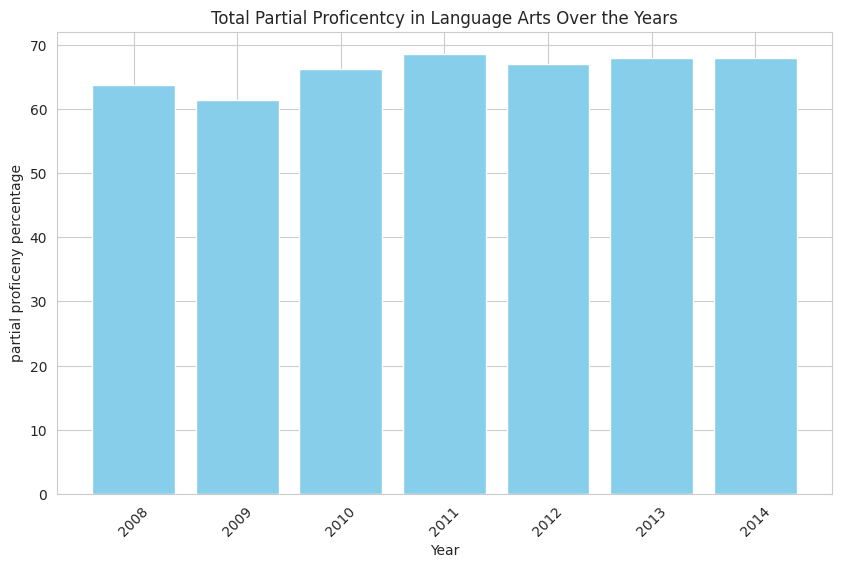

In [56]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(total_pp_per_year['Year'], total_pp_per_year['PP'], color='skyblue')
plt.xlabel('Year')
plt.ylabel('partial proficeny percentage')
plt.title('Total Partial Proficentcy in Language Arts Over the Years')
plt.xticks(rotation=45)  # Rotate years for better readability
plt.show()


In [70]:
import pandas as pd

def convert_columns(df):
    columns_to_convert = ['Total Enroll Lang', 'Valid Scores Lang', 'Total PP Lang', 'Total P Lang', 'Total AP Lang', 'Mean Scale Score']
    for column in columns_to_convert:
        df[column] = pd.to_numeric(df[column], errors='coerce')
    df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
    return df


In [71]:
pre4 = convert_columns(pre4)
pre5 = convert_columns(pre5)
pre6 = convert_columns(pre6)
pre7 = convert_columns(pre7)
pre8 = convert_columns(pre8)


In [72]:
import pandas as pd
import numpy as np

def process_data(df, grade):
    years = [2008, 2009, 2010, 2011, 2012, 2013, 2014]
    results = []

    for year in years:
        camden_city_criteria = (df['School Name'].str.contains('CAMDEN CITY', case=False, na=False) &
                                (df['Year'] == year))

        charter_criteria = (df['District Name'].str.contains('CHARTER', case=False, na=False) &
                            (df['Year'] == year))

        combined_criteria = camden_city_criteria | charter_criteria

        filtered = df[combined_criteria]
        score_columns = ['Total PP Lang', 'Total P Lang', 'Total AP Lang', 'Mean Scale Score']
        count_column = 'Valid Scores Lang'

        weighted_sums = (filtered[score_columns].T * filtered[count_column]).T.sum()
        total_valid_test_takers = filtered[count_column].sum()

        weighted_averages = weighted_sums / total_valid_test_takers

        results.append({
            'Year': year,
            'Grade': grade,
            'PP': weighted_averages.get('Total PP Lang', np.nan),
            'P': weighted_averages.get('Total P Lang', np.nan),
            'AP': weighted_averages.get('Total AP Lang', np.nan),
            'Mean Scale Score': weighted_averages.get('Mean Scale Score', np.nan),
            'Total Valid Test Takers': total_valid_test_takers,
        })

    return pd.DataFrame(results)


In [73]:
# Assuming pre4, pre5, pre6, pre7 have a 'Grade' column specifying the grade
# Example: pre4['Grade'] = 'Grade 4' and so on, before concatenating
all_data = pd.concat([pre4, pre5, pre6, pre7, pre8], ignore_index=True)


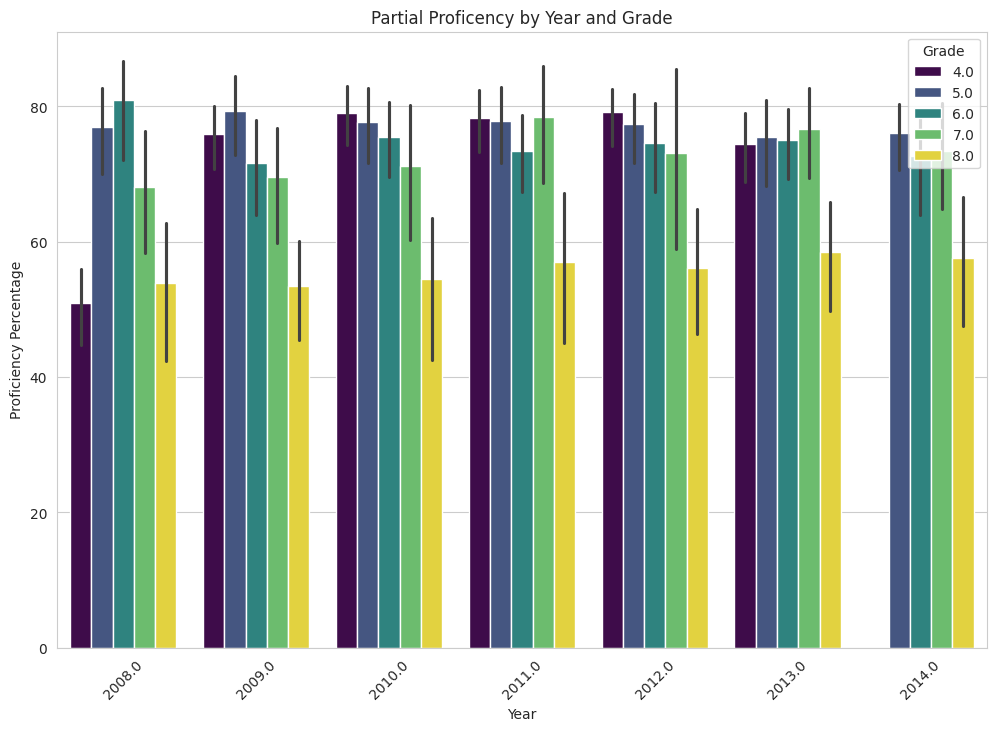

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a bar plot for 'Mean Scale Score' over years, grouped by 'Grade'
plt.figure(figsize=(12, 8))  # Adjust size as necessary
bar_plot = sns.barplot(x='Year', y='Total PP Lang', hue='Gr', data=all_data, palette='viridis')

# Add title and labels
plt.title('Partial Proficency by Year and Grade')
plt.xlabel('Year')
plt.ylabel('Proficiency Percentage')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adding a legend
plt.legend(title='Grade', loc='upper right')

# Show the plot
plt.show()


In [76]:
import pandas as pd

def extract_state_data(file_path, ST):
    state_data = file_path[file_path['County Name'] == ST]
    return state_data

# Apply the function to each grade DataFrame
state_data_pre4 = extract_state_data(pre4, 'ST')
state_data_pre5 = extract_state_data(pre5, 'ST')
state_data_pre6 = extract_state_data(pre6, 'ST')
state_data_pre7 = extract_state_data(pre7, 'ST')
state_data_pre8 = extract_state_data(pre8, 'ST')

In [90]:
def calculate_z_scores(all_data, state_data):
    # Ensure state data has necessary statistics per grade and year
    state_stats = state_data.groupby(['Year', 'Gr'])['Mean Scale Score'].agg(['mean', 'std']).reset_index()
    state_stats.rename(columns={'mean': 'State_Mean', 'std': 'State_Std'}, inplace=True)

    # Merge the grade data with state statistics
    merged_df = pd.merge(all_data, state_stats, on=['Year', 'Gr'], how='left')

    # Calculate Z-scores
    merged_df['Z_Score'] = (merged_df['Mean Scale Score'] - merged_df['State_Mean']) / merged_df['State_Std']

    return merged_df

# Example: Assigning grade levels to state data before using it for Z-score calculations
state_data_pre4['Grade'] = 'Grade 4'
state_data_pre5['Grade'] = 'Grade 5'
state_data_pre6['Grade'] = 'Grade 6'
state_data_pre7['Grade'] = 'Grade 7'
state_data_pre8['Grade'] = 'Grade 8'

# Concatenate all state data into one DataFrame
state_data_all = pd.concat([state_data_pre4, state_data_pre5, state_data_pre6, state_data_pre7, state_data_pre8], ignore_index=True)

# Calculate Z-scores for the concatenated data of all grades
all_data_with_z_scores = calculate_z_scores(all_data, state_data_all)


count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Z_Score, dtype: float64


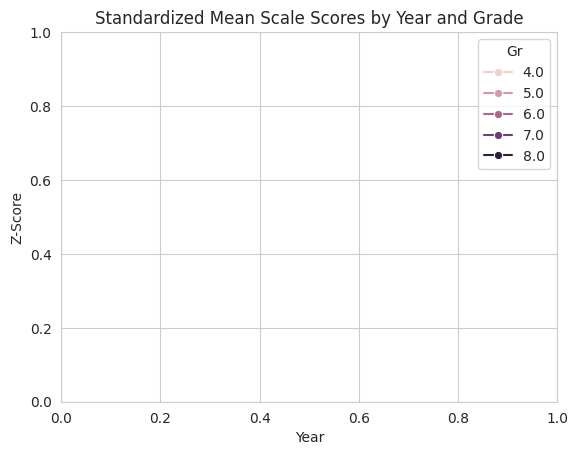

In [94]:
# Check the distribution of Z-scores
print(all_data_with_z_scores['Z_Score'].describe())

# Possible further analysis or visualization
# For example, plotting Z-scores across years for each grade
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(data=all_data_with_z_scores, x='Year', y='Z_Score', hue='Gr', marker='o')
plt.title('Standardized Mean Scale Scores by Year and Grade')
plt.xlabel('Year')
plt.ylabel('Z-Score')
plt.show()
